# THE WHO and WHY of Telco Churn 

In [2]:
import warnings
warnings.filterwarnings("ignore")

#adding those necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pydataset as data

#sklearn tools:: working those models!
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#calling those py files
from acquire import get_telco_data
from prepare import clean_telco_data, prep_telco_data

from env import get_db_url

α = .05

#calling the dataframe
telco_df = get_telco_data()
#prepped and split
train, validate, test = prep_telco_data(telco_df)

# Question: Is there a specific demographic group that is associated with more churn than expected?

## Goal: Find the main demographic drivers and their subgroups for Telco churn.
*I decided to look into demographics first, as this wasn't subgroups I was able to explore last presentation project.

## QUESTION 1: Are more churned customers single and/or without dependents?

### Hypothesis 1:
- <i>H0: There is NO relationship between churn and customers without partners
- <i>Ha: There IS a relationship between churn and customers without partners

In [4]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: churn rate has no relation to partnerships of customers
# Alternative hypothesis: there is a relationship between churn rate and partnerships of customers
alpha = 0.05
observed = pd.crosstab(train.churn, train.partner)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that partnership and churn are independent")

The p-value is 2.0115703972096128e-23
Sufficient evidence is present to reject the null hypothesis


#### USING VISUALS...

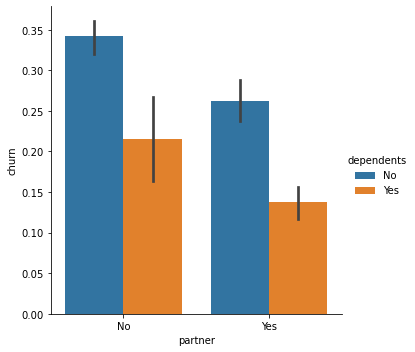

In [8]:
# Binary encode the target variable
train.churn = train.churn == "Yes"
#Relationship between churn, customers having partners and dependents
sns.catplot(x="partner", y ="churn",  hue="dependents",data=train, kind="bar")

## OUTCOME: I rejected the Null Hypothesis, in that there is a relationship with single customers and churn.

## QUESTION 2: Are more Senior Citizens churning than other age groups?

Hypothesis 2:

* <i>H0: There is NO relationship between churn and Senior customers.
* <i>Ha: There IS a relationship between churn and Senior customers.

In [12]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: churn rate has no relation to senior citizen customers
# Alternative hypothesis: there is a relationship between churn rate and senior citizens
alpha = 0.05
observed = pd.crosstab(train.churn, train.senior_citizen)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that senior_citizens and churn are independent")

The p-value is 1.1002429756735793e-26
Sufficient evidence is present to reject the null hypothesis


#### USING VISUALS...

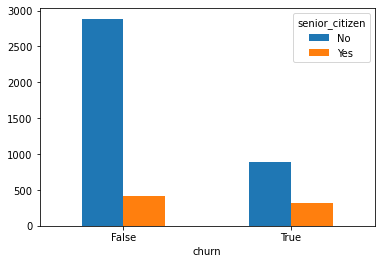

In [14]:
#let's look at the numbers visually
barplot = observed.plot.bar(rot=0)

## OUTCOME: I rejected the Null Hypothesis, in that there is a relationship with senior customers and churn.
- From first glance, because of the low amount of Senior Citizen data count, it looks like customers 59 and younger have more churns. By numbers, YES, 59 and younger DO have more churn, but by churn rate based on its own category, Senior Citizens have the highest churn rate.

<b>Senior Citizens: 41% churned
59 and younger customers: 24% churned</b>


## INTERNET TYPE ACCOUNTS- Are you getting enough FIBER??

Seeing if internet type relates to the churn rate.

* H0: There is NO relationship between internet type of accounts and customers churning.
* Ha: There IS a relationship between internet type of and customers churning.

In [20]:
# Chi squared with un-encoded categorical columns
alpha = 0.05
observed = pd.crosstab(train.internet_service_type, train.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that senior customers and internet account types are independent")

The p-value is 2.4617612720873587e-96
Sufficient evidence is present to reject the null hypothesis


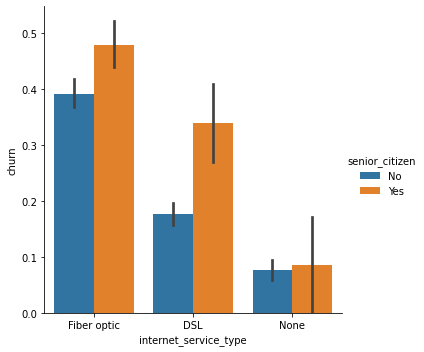

In [21]:
#Relationship between Senior customers and their internet service type against their churn rate
sns.catplot(x="internet_service_type", y ="churn",  hue="senior_citizen",data=train, kind="bar")

# MODELING: Strike a pose...and get learning
The models I went through in my training exploration were:
  * <u><b>Logistical Regression: </u></b>I chose this first to weigh all of the numeric data against target
  * <u>Decision Tree:</u>
  * <u>Random Forest:</u>
  * <u>KNN:</u>

<b>BASELINE: 73%</b>

In [23]:
#Defining the baseline prediction:
train.churn.mode()
#Mode meaning when a customer did not churn, so our baseline guess would be that a customer will not churn. 


#Calculating the percentage of customers that churned:
train[train['churn'] == False].shape[0] / train.shape[0]

0.7342222222222222

## Logistical Regression: all features- 80% | only chosen features -74%

## Decision Tree: train-83% | val-79%|max depth-8

## Random Forest: train-84% | val-80% | max depth-9 | diff-3%
## Random Forest: train-84% | val-81% | max depth-14 | minleaf-6 | diff-3%

## KNN: 82% acc. | 5 neighbors